# FEATURE ENGINEERING
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data in DANA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('user_data_clean_ori.csv', sep=';')

In [73]:
df.head()

,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,...,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,uid
0,0,19387,19390,18629,-23373,1,25,1.740000e+16,173,60,...,0,0,0,0,0,0,0,0,1,208cc2b1-7e8c-43d2-ba9f-32269abdf078
1,1,19371,19379,17905,-14610,1,33,7.340000e+15,384,88,...,0,0,0,0,0,0,0,0,1,afbeffbd-b905-4323-ac1a-3ba3e07f6951
2,1,18910,18915,18632,-14604,1,27,6.030000e+15,68,5,...,0,1,0,0,0,0,0,0,0,24b253b8-84b4-42d4-92b0-7b8537d4f066
3,1,19571,19571,19358,-14243,1,0,0.000000e+00,13,6,...,0,1,0,0,0,0,0,0,0,32414559-95f1-48fd-83ff-1ff7cc711d88
4,1,19510,19510,19001,-13508,1,0,0.000000e+00,65,26,...,0,1,0,0,0,0,0,0,0,80126b5b-7219-4266-b94b-85620d0b4498


<AxesSubplot:xlabel='birthday', ylabel='Count'>

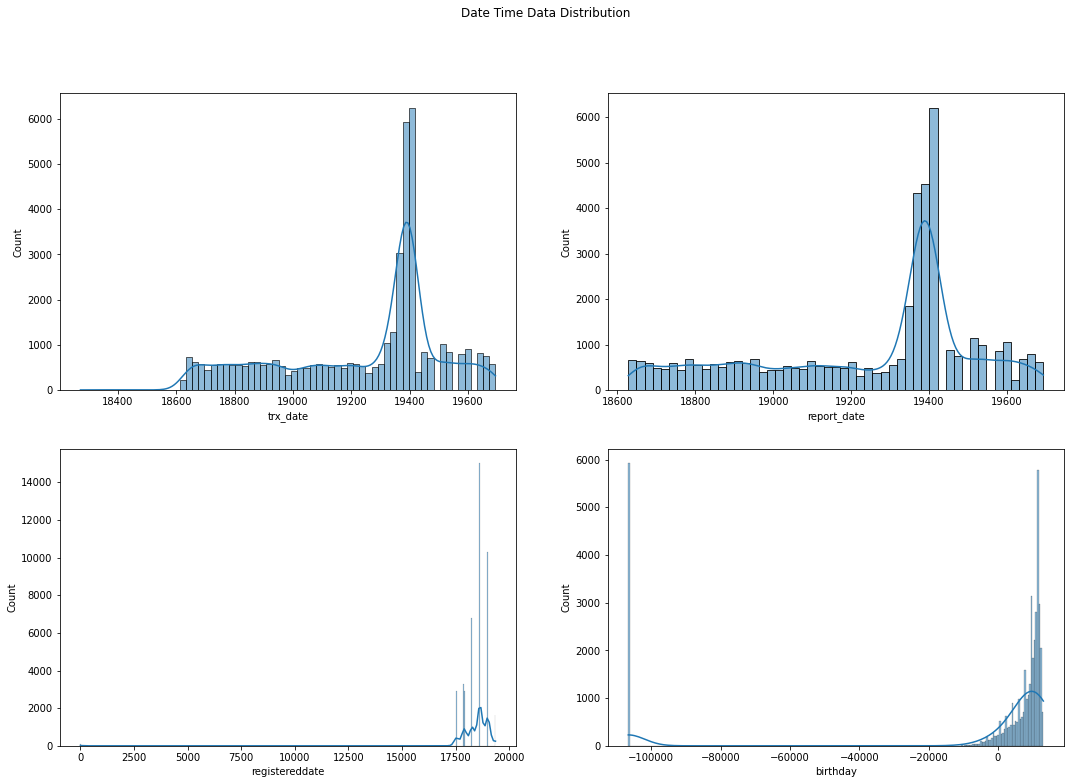

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

fig.suptitle('Date Time Data Distribution')

sns.histplot(ax=axes[0, 0], data=df['trx_date'], kde=True)
sns.histplot(ax=axes[0, 1], data=df['report_date'], kde=True)
sns.histplot(ax=axes[1, 0], data=df['registereddate'], kde=True)
sns.histplot(ax=axes[1, 1], data=df['birthday'], kde=True)

<AxesSubplot:xlabel='centrality_outdegree_sendmoney', ylabel='Count'>

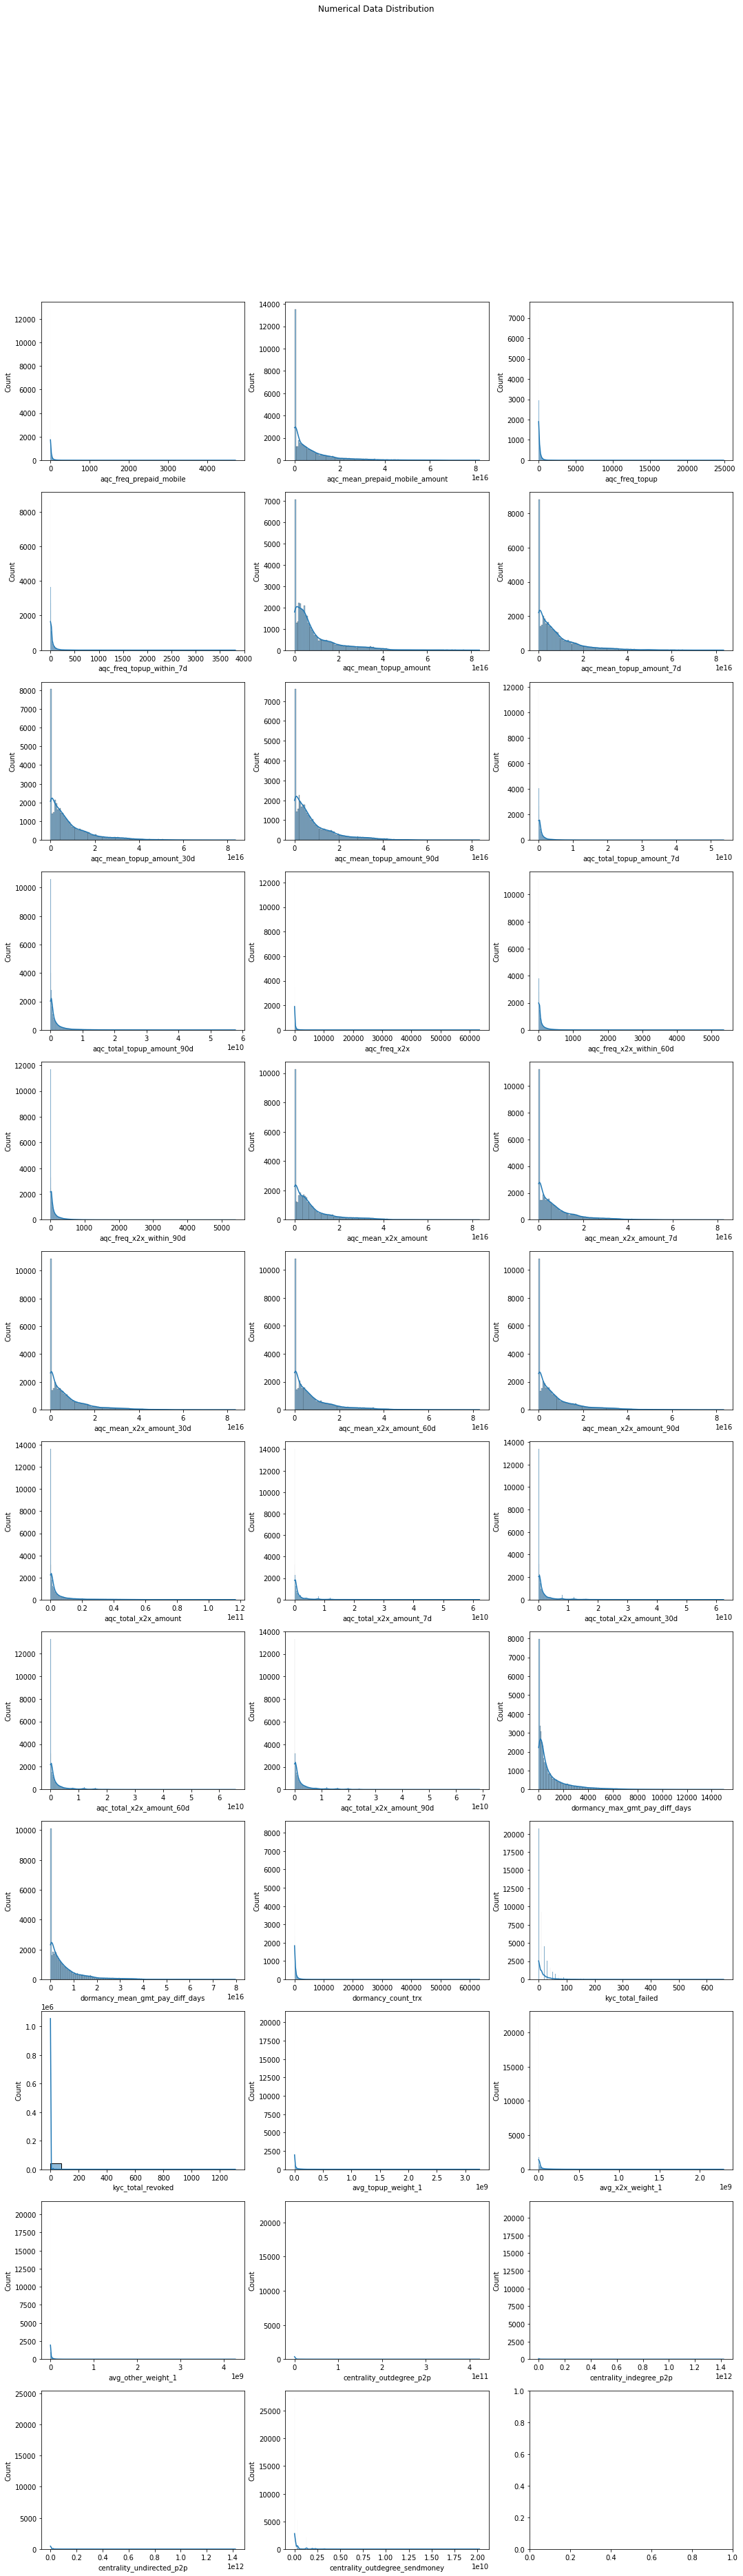

In [28]:
fig, axes = plt.subplots(12, 3, figsize=(18, 60))

fig.suptitle("Numerical Data Distribution")

sns.histplot(ax=axes[0, 0], data=df['aqc_freq_prepaid_mobile'], kde=True)
sns.histplot(ax=axes[0, 1], data=df['aqc_mean_prepaid_mobile_amount'], kde=True)
sns.histplot(ax=axes[0, 2], data=df['aqc_freq_topup'], kde=True)

sns.histplot(ax=axes[1, 0], data=df['aqc_freq_topup_within_7d'], kde=True)
sns.histplot(ax=axes[1, 1], data=df['aqc_mean_topup_amount'], kde=True)
sns.histplot(ax=axes[1, 2], data=df['aqc_mean_topup_amount_7d'], kde=True)

sns.histplot(ax=axes[2, 0], data=df['aqc_mean_topup_amount_30d'], kde=True)
sns.histplot(ax=axes[2, 1], data=df['aqc_mean_topup_amount_90d'], kde=True)
sns.histplot(ax=axes[2, 2], data=df['aqc_total_topup_amount_7d'], kde=True)

sns.histplot(ax=axes[3, 0], data=df['aqc_total_topup_amount_90d'], kde=True)
sns.histplot(ax=axes[3, 1], data=df['aqc_freq_x2x'], kde=True)
sns.histplot(ax=axes[3, 2], data=df['aqc_freq_x2x_within_60d'], kde=True)

sns.histplot(ax=axes[4, 0], data=df['aqc_freq_x2x_within_90d'], kde=True)
sns.histplot(ax=axes[4, 1], data=df['aqc_mean_x2x_amount'], kde=True)
sns.histplot(ax=axes[4, 2], data=df['aqc_mean_x2x_amount_7d'], kde=True)

sns.histplot(ax=axes[5, 0], data=df['aqc_mean_x2x_amount_30d'], kde=True)
sns.histplot(ax=axes[5, 1], data=df['aqc_mean_x2x_amount_60d'], kde=True)
sns.histplot(ax=axes[5, 2], data=df['aqc_mean_x2x_amount_90d'], kde=True)

sns.histplot(ax=axes[6, 0], data=df['aqc_total_x2x_amount'], kde=True)
sns.histplot(ax=axes[6, 1], data=df['aqc_total_x2x_amount_7d'], kde=True)
sns.histplot(ax=axes[6, 2], data=df['aqc_total_x2x_amount_30d'], kde=True)

sns.histplot(ax=axes[7, 0], data=df['aqc_total_x2x_amount_60d'], kde=True)
sns.histplot(ax=axes[7, 1], data=df['aqc_total_x2x_amount_90d'], kde=True)
sns.histplot(ax=axes[7, 2], data=df['dormancy_max_gmt_pay_diff_days'], kde=True)

sns.histplot(ax=axes[8, 0], data=df['dormancy_mean_gmt_pay_diff_days'], kde=True)
sns.histplot(ax=axes[8, 1], data=df['dormancy_count_trx'], kde=True)
sns.histplot(ax=axes[8, 2], data=df['kyc_total_failed'], kde=True)

sns.histplot(ax=axes[9, 0], data=df['kyc_total_revoked'], kde=True)
sns.histplot(ax=axes[9, 1], data=df['avg_topup_weight_1'], kde=True)
sns.histplot(ax=axes[9, 2], data=df['avg_x2x_weight_1'], kde=True)

sns.histplot(ax=axes[10, 0], data=df['avg_other_weight_1'], kde=True)
sns.histplot(ax=axes[10, 1], data=df['centrality_outdegree_p2p'], kde=True)
sns.histplot(ax=axes[10, 2], data=df['centrality_indegree_p2p'], kde=True)

sns.histplot(ax=axes[11, 0], data=df['centrality_undirected_p2p'], kde=True)
sns.histplot(ax=axes[11, 1], data=df['centrality_outdegree_sendmoney'], kde=True)

In [32]:
df1 = df.copy()

### Feature Clipping for Extreme Outliers
#### Promote a more Gaussian Distribution

[Text(0.5, 1.0, 'After')]

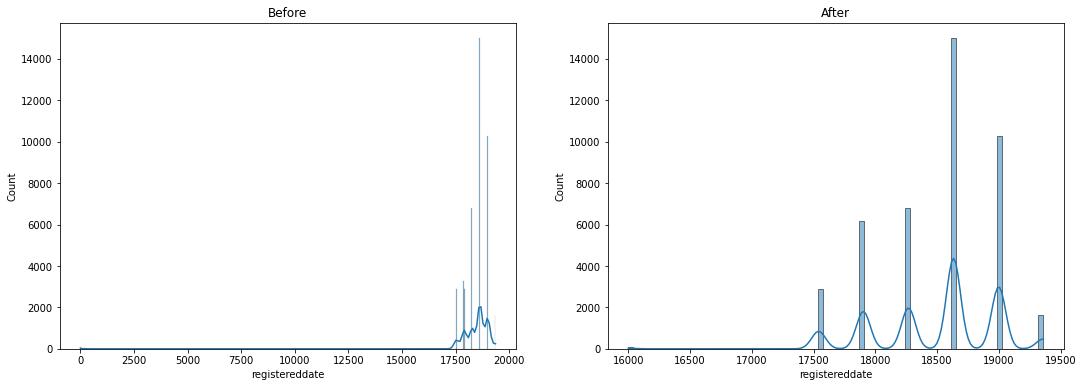

In [48]:
# Clipping 'registereddate' to (16000, 19360)
df1['registereddate'] = df1['registereddate'].clip(16000, 19360)

# Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['registereddate'], kde=True).set(title='Before')
sns.histplot(ax=axes[1], data=df1['registereddate'], kde=True).set(title='After')

[Text(0.5, 1.0, 'After')]

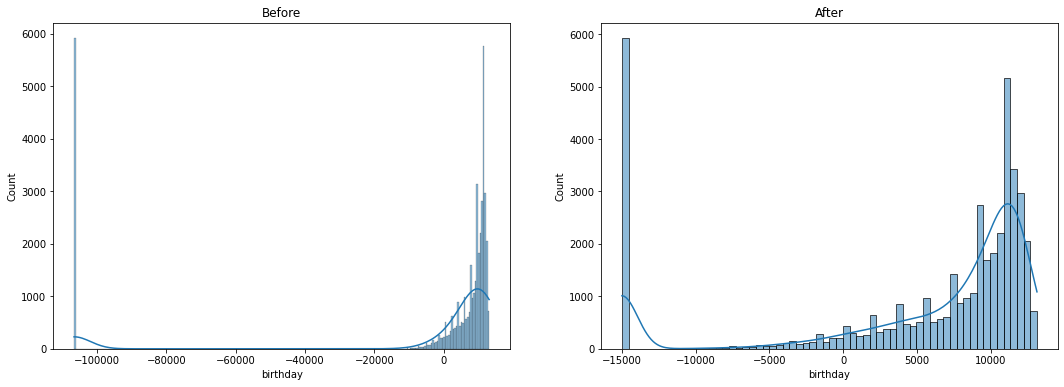

In [50]:
# Clipping 'birthday' to (-15000, 13149)
df1['birthday'] = df1['birthday'].clip(-15000, 13149)

# Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['birthday'], kde=True).set(title='Before')
sns.histplot(ax=axes[1], data=df1['birthday'], kde=True).set(title='After')

In [114]:
# Clipping Other Numerical Data to .99th quantile
for i in range(6, 41):
    df1[df1.columns[i]] = df1[df1.columns[i]].clip(0, int(df1[df1.columns[i]].quantile(.99)))

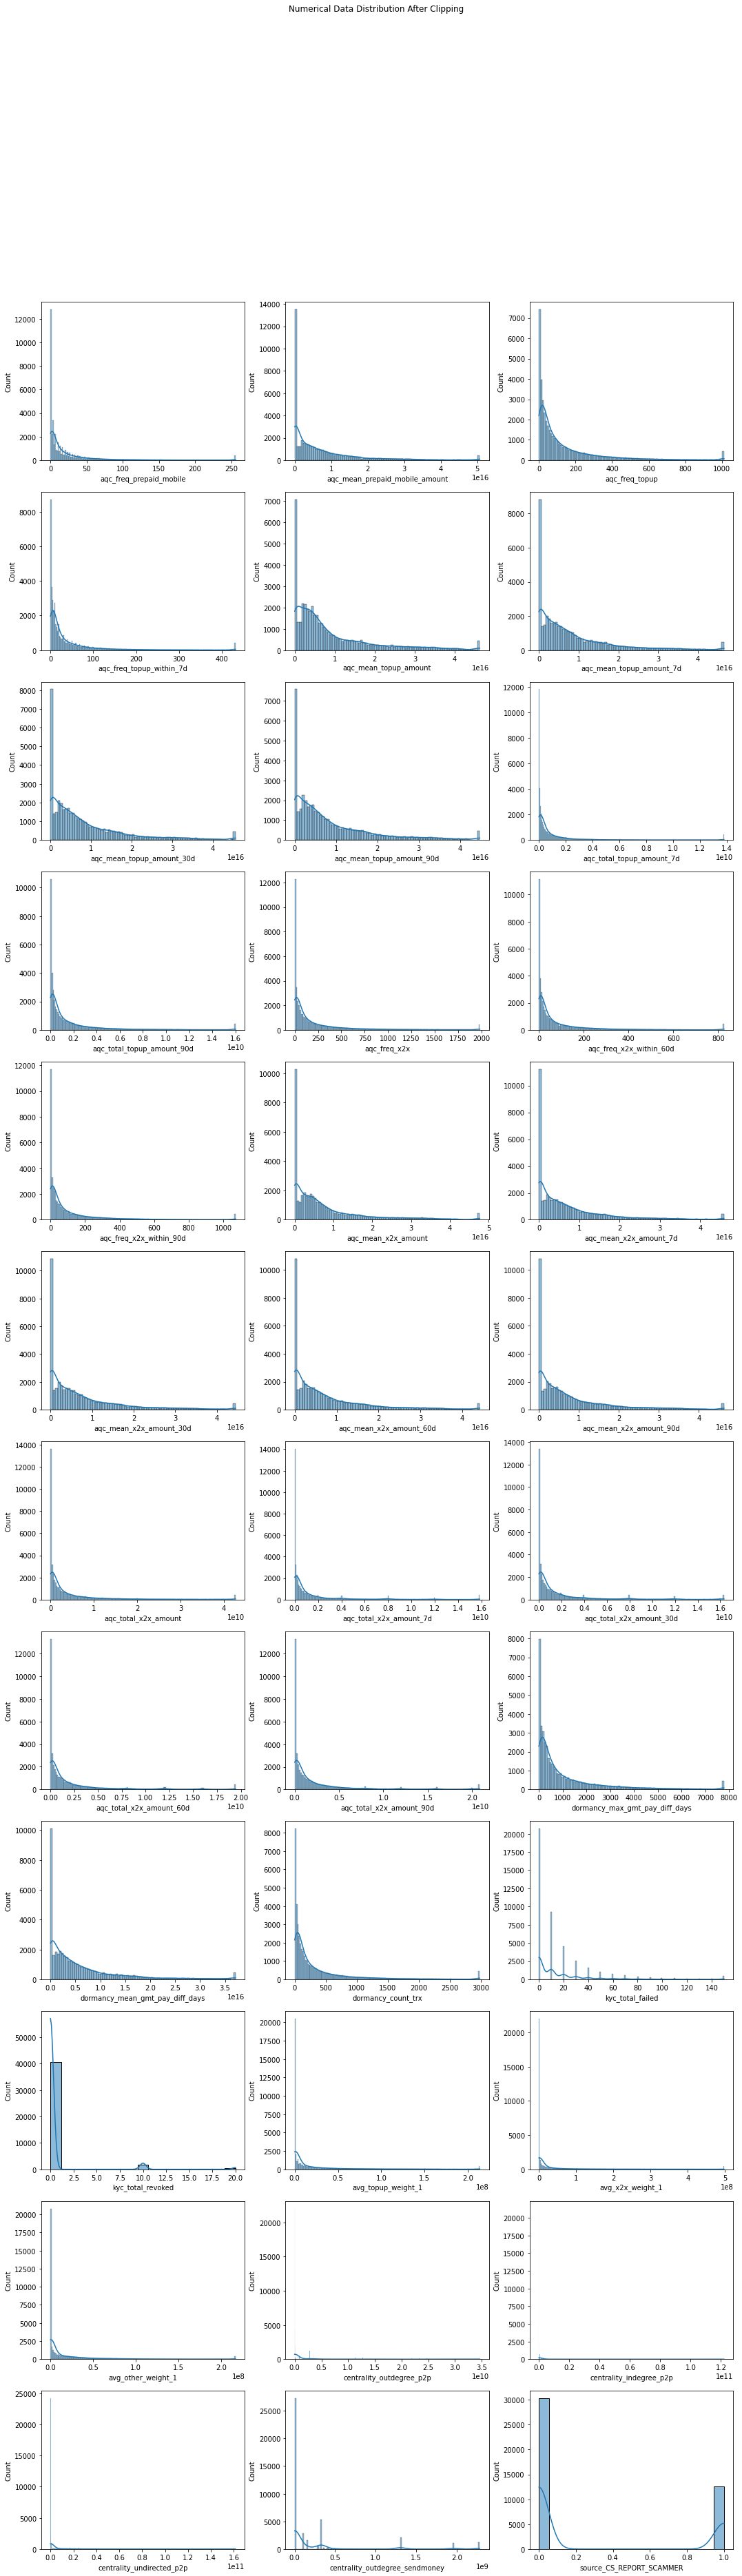

In [115]:
# After Clipping

fig, axes = plt.subplots(12, 3, figsize=(18, 60))

fig.suptitle("Numerical Data Distribution After Clipping")

n = 6
for i in range(0,12):
    for j in range(0,3):
        sns.histplot(ax=axes[i, j], data=df1[df1.columns[n]], kde=True)
        n += 1

### Normalisation